In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('./nba_scraped_data.csv')
df

,#,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,YEAR
0,2023-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Joel Embiid,PHI,27.0,34.1,34.6,11.6,21.7,53.5,1.1,...,88.2,2.7,9.1,11.8,6.0,1.1,2.0,3.9,40.2,2023-24
2,2,Luka Doncic,DAL,33.0,36.8,33.7,11.5,23.6,48.7,4.0,...,78.0,0.7,7.5,8.2,9.2,1.3,0.6,4.0,35.0,2023-24
3,3,Giannis Antetokounmpo,MIL,35.0,35.1,31.6,11.7,19.2,61.0,0.4,...,67.8,2.6,8.9,11.5,5.7,1.3,1.2,3.6,36.7,2023-24
4,4,Shai Gilgeous-Alexander,OKC,33.0,34.8,31.5,11.3,20.7,54.7,1.2,...,89.1,0.8,5.2,6.0,6.4,2.4,0.7,1.9,34.8,2023-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,254,JT Thor,CHA,27.0,14.5,3.0,1.2,3.1,38.8,0.5,...,42.9,0.7,1.7,2.4,0.4,0.2,0.4,0.2,4.1,2023-24
255,255,Jaxson Hayes,LAL,31.0,10.2,2.9,1.2,1.9,65.5,0.0,...,53.6,0.5,1.4,1.8,0.3,0.2,0.3,0.5,4.0,2023-24
256,256,Andre Jackson Jr.,MIL,30.0,9.8,2.4,0.9,1.7,53.8,0.4,...,80.0,0.7,0.9,1.6,0.8,0.3,0.0,0.5,3.9,2023-24
257,257,Cody Zeller,NOP,27.0,9.1,2.0,0.6,1.7,34.8,0.0,...,60.6,1.1,1.7,2.8,1.1,0.1,0.1,0.4,4.2,2023-24


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #       259 non-null    object 
 1   PLAYER  258 non-null    object 
 2   TEAM    258 non-null    object 
 3   GP      258 non-null    float64
 4   MIN     258 non-null    float64
 5   PTS     258 non-null    float64
 6   FGM     258 non-null    float64
 7   FGA     258 non-null    float64
 8   FG%     258 non-null    float64
 9   3PM     258 non-null    float64
 10  3PA     258 non-null    float64
 11  3P%     258 non-null    float64
 12  FTM     258 non-null    float64
 13  FTA     258 non-null    float64
 14  FT%     258 non-null    float64
 15  OREB    258 non-null    float64
 16  DREB    258 non-null    float64
 17  REB     258 non-null    float64
 18  AST     258 non-null    float64
 19  STL     258 non-null    float64
 20  BLK     258 non-null    float64
 21  TOV     258 non-null    float64
 22  EF

# Data Cleaning

In [23]:
# Drop rows that have 'NaN' values and '#' column
df = df.dropna()
df = df.drop('#', axis=1)

In [24]:
# Create a rearranged list 
arrange_columns = ['YEAR', 'PLAYER', 'TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'EFF']

# Set dataframe to new columns
df = df[arrange_columns]

df.head()

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,2023-24,Joel Embiid,PHI,27.0,34.1,34.6,11.6,21.7,53.5,1.1,...,11.6,88.2,2.7,9.1,11.8,6.0,1.1,2.0,3.9,40.2
2,2023-24,Luka Doncic,DAL,33.0,36.8,33.7,11.5,23.6,48.7,4.0,...,8.5,78.0,0.7,7.5,8.2,9.2,1.3,0.6,4.0,35.0
3,2023-24,Giannis Antetokounmpo,MIL,35.0,35.1,31.6,11.7,19.2,61.0,0.4,...,11.5,67.8,2.6,8.9,11.5,5.7,1.3,1.2,3.6,36.7
4,2023-24,Shai Gilgeous-Alexander,OKC,33.0,34.8,31.5,11.3,20.7,54.7,1.2,...,8.6,89.1,0.8,5.2,6.0,6.4,2.4,0.7,1.9,34.8
5,2023-24,Kevin Durant,PHX,29.0,37.1,29.6,10.4,19.8,52.3,2.1,...,7.7,87.5,0.4,5.9,6.4,6.0,0.9,1.1,3.3,30.3


In [25]:
# Show the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 1 to 258
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    258 non-null    object 
 1   PLAYER  258 non-null    object 
 2   TEAM    258 non-null    object 
 3   GP      258 non-null    float64
 4   MIN     258 non-null    float64
 5   PTS     258 non-null    float64
 6   FGM     258 non-null    float64
 7   FGA     258 non-null    float64
 8   FG%     258 non-null    float64
 9   3PM     258 non-null    float64
 10  3PA     258 non-null    float64
 11  3P%     258 non-null    float64
 12  FTM     258 non-null    float64
 13  FTA     258 non-null    float64
 14  FT%     258 non-null    float64
 15  OREB    258 non-null    float64
 16  DREB    258 non-null    float64
 17  REB     258 non-null    float64
 18  AST     258 non-null    float64
 19  STL     258 non-null    float64
 20  BLK     258 non-null    float64
 21  TOV     258 non-null    float64
 22  EF

# Visualization

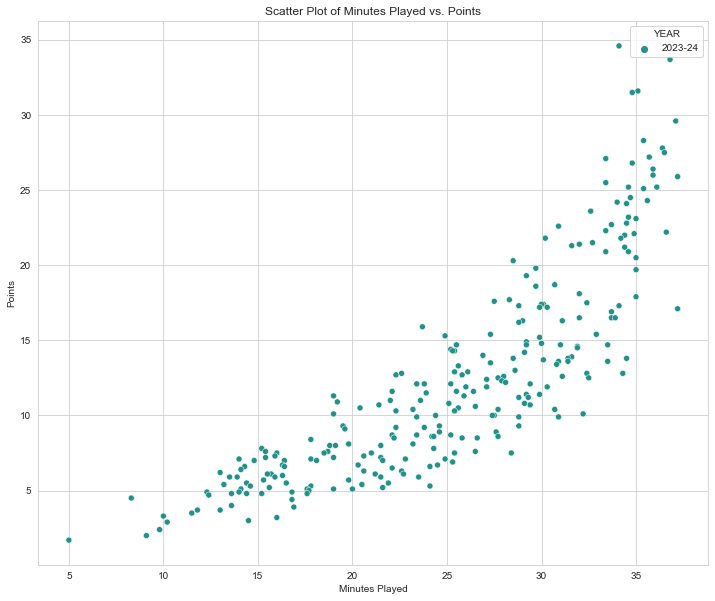

In [26]:
# Create a scatter plot on minutes vs points scored
plt.figure(figsize=(12, 10))
sns.scatterplot(x='MIN', y='PTS', data=df, hue='YEAR', palette='viridis')
plt.title('Scatter Plot of Minutes Played vs. Points')
plt.xlabel('Minutes Played')
plt.ylabel('Points')
plt.show()


In [27]:
# Find the top 10 players with the most assists the of the 2023-24 season
assists_df = df.loc[df['AST'] >=6].head(10)
assists_df.sort_values(by='AST', ascending=False, inplace=True)
assists_df

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
7,2023-24,Trae Young,ATL,33.0,36.4,27.8,8.6,20.0,43.2,3.4,...,8.4,85.5,0.5,2.6,3.1,11.0,1.5,0.2,4.3,26.7
2,2023-24,Luka Doncic,DAL,33.0,36.8,33.7,11.5,23.6,48.7,4.0,...,8.5,78.0,0.7,7.5,8.2,9.2,1.3,0.6,4.0,35.0
15,2023-24,Nikola Jokic,DEN,37.0,33.4,25.5,9.9,17.4,56.9,1.1,...,5.6,81.8,2.8,9.0,11.8,9.2,1.2,0.9,2.7,37.4
12,2023-24,Devin Booker,PHX,27.0,35.9,26.4,9.0,18.9,47.6,2.1,...,7.1,88.1,0.8,4.2,5.0,7.9,0.9,0.4,2.9,26.9
14,2023-24,Tyrese Maxey,PHI,34.0,37.2,25.9,8.9,19.6,45.5,3.1,...,5.7,87.2,0.6,3.1,3.6,6.6,0.9,0.6,1.5,24.6
4,2023-24,Shai Gilgeous-Alexander,OKC,33.0,34.8,31.5,11.3,20.7,54.7,1.2,...,8.6,89.1,0.8,5.2,6.0,6.4,2.4,0.7,1.9,34.8
13,2023-24,Jalen Brunson,NYK,36.0,35.9,26.0,9.2,19.5,47.2,2.9,...,5.8,83.1,0.6,3.3,3.9,6.4,1.0,0.2,2.4,23.9
1,2023-24,Joel Embiid,PHI,27.0,34.1,34.6,11.6,21.7,53.5,1.1,...,11.6,88.2,2.7,9.1,11.8,6.0,1.1,2.0,3.9,40.2
5,2023-24,Kevin Durant,PHX,29.0,37.1,29.6,10.4,19.8,52.3,2.1,...,7.7,87.5,0.4,5.9,6.4,6.0,0.9,1.1,3.3,30.3
6,2023-24,De'Aaron Fox,SAC,29.0,35.4,28.3,10.0,21.4,46.9,3.2,...,6.9,72.1,1.0,3.4,4.4,6.0,1.6,0.4,2.6,24.8


In [28]:
# Find the top 10 players with the most rebounds the of the 2023-24 season
rebounds_df = df.loc[df['REB'] >= 6].head(10)
rebounds_df .sort_values(by='REB', ascending=False, inplace=True)
rebounds_df 

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
16,2023-24,Anthony Davis,LAL,35.0,36.1,25.2,9.6,17.3,55.6,0.3,...,7.1,80.2,3.3,9.0,12.2,3.3,1.2,2.6,2.2,33.4
1,2023-24,Joel Embiid,PHI,27.0,34.1,34.6,11.6,21.7,53.5,1.1,...,11.6,88.2,2.7,9.1,11.8,6.0,1.1,2.0,3.9,40.2
15,2023-24,Nikola Jokic,DEN,37.0,33.4,25.5,9.9,17.4,56.9,1.1,...,5.6,81.8,2.8,9.0,11.8,9.2,1.2,0.9,2.7,37.4
3,2023-24,Giannis Antetokounmpo,MIL,35.0,35.1,31.6,11.7,19.2,61.0,0.4,...,11.5,67.8,2.6,8.9,11.5,5.7,1.3,1.2,3.6,36.7
20,2023-24,Julius Randle,NYK,36.0,35.6,24.3,8.7,18.3,47.4,1.5,...,7.1,77.2,2.1,7.3,9.3,4.7,0.6,0.3,3.4,24.6
8,2023-24,Jayson Tatum,BOS,33.0,36.5,27.5,9.3,19.5,47.9,3.2,...,6.9,80.8,1.0,7.7,8.7,4.5,1.0,0.5,2.9,27.8
2,2023-24,Luka Doncic,DAL,33.0,36.8,33.7,11.5,23.6,48.7,4.0,...,8.5,78.0,0.7,7.5,8.2,9.2,1.3,0.6,4.0,35.0
17,2023-24,LeBron James,LAL,34.0,34.6,25.2,9.4,17.9,52.7,2.2,...,5.6,74.0,0.9,6.4,7.3,7.4,1.5,0.6,3.3,28.8
5,2023-24,Kevin Durant,PHX,29.0,37.1,29.6,10.4,19.8,52.3,2.1,...,7.7,87.5,0.4,5.9,6.4,6.0,0.9,1.1,3.3,30.3
4,2023-24,Shai Gilgeous-Alexander,OKC,33.0,34.8,31.5,11.3,20.7,54.7,1.2,...,8.6,89.1,0.8,5.2,6.0,6.4,2.4,0.7,1.9,34.8


In [29]:
# Find the top 10 scorers of the 2023-24 season
top_ten_df = df.loc[df['YEAR'] == '2023-24'].head(10)
top_ten_df.sort_values(by='PTS', ascending=False, inplace=True)
top_ten_df

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,2023-24,Joel Embiid,PHI,27.0,34.1,34.6,11.6,21.7,53.5,1.1,...,11.6,88.2,2.7,9.1,11.8,6.0,1.1,2.0,3.9,40.2
2,2023-24,Luka Doncic,DAL,33.0,36.8,33.7,11.5,23.6,48.7,4.0,...,8.5,78.0,0.7,7.5,8.2,9.2,1.3,0.6,4.0,35.0
3,2023-24,Giannis Antetokounmpo,MIL,35.0,35.1,31.6,11.7,19.2,61.0,0.4,...,11.5,67.8,2.6,8.9,11.5,5.7,1.3,1.2,3.6,36.7
4,2023-24,Shai Gilgeous-Alexander,OKC,33.0,34.8,31.5,11.3,20.7,54.7,1.2,...,8.6,89.1,0.8,5.2,6.0,6.4,2.4,0.7,1.9,34.8
5,2023-24,Kevin Durant,PHX,29.0,37.1,29.6,10.4,19.8,52.3,2.1,...,7.7,87.5,0.4,5.9,6.4,6.0,0.9,1.1,3.3,30.3
6,2023-24,De'Aaron Fox,SAC,29.0,35.4,28.3,10.0,21.4,46.9,3.2,...,6.9,72.1,1.0,3.4,4.4,6.0,1.6,0.4,2.6,24.8
7,2023-24,Trae Young,ATL,33.0,36.4,27.8,8.6,20.0,43.2,3.4,...,8.4,85.5,0.5,2.6,3.1,11.0,1.5,0.2,4.3,26.7
8,2023-24,Jayson Tatum,BOS,33.0,36.5,27.5,9.3,19.5,47.9,3.2,...,6.9,80.8,1.0,7.7,8.7,4.5,1.0,0.5,2.9,27.8
9,2023-24,Donovan Mitchell,CLE,27.0,35.7,27.2,9.4,20.8,45.5,3.1,...,6.0,87.6,1.0,4.3,5.3,5.7,1.9,0.5,2.7,25.8
10,2023-24,Stephen Curry,GSW,34.0,33.4,27.1,8.5,19.0,45.0,4.6,...,5.9,92.0,0.5,3.8,4.3,4.6,0.8,0.4,3.1,23.3


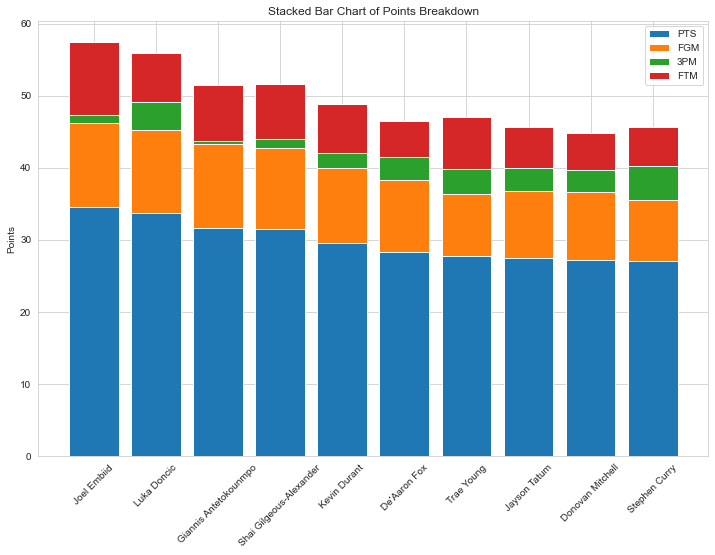

In [30]:
# Create stacked bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Stack the bars for different categories
bottom = None
for col in ['PTS', 'FGM', '3PM', 'FTM']:
    ax.bar(top_ten_df['PLAYER'], top_ten_df[col], label=col, bottom=bottom)
    if bottom is None:
        bottom = top_ten_df[col]
    else:
        bottom += top_ten_df[col]

ax.set_ylabel('Points')
ax.set_title('Stacked Bar Chart of Points Breakdown')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [31]:
# Create a dataframe for players with the most rebounds
top_ten_rebounds = df.loc[df['REB'] > 4].head(10)
top_ten_rebounds = top_ten_rebounds[['PLAYER', 'YEAR', 'MIN', 'PTS', 'REB']]
top_ten_rebounds_sorted = top_ten_rebounds.sort_values(by='REB', ascending=False)

In [32]:
print(top_ten_rebounds_sorted)

                     PLAYER     YEAR   MIN   PTS   REB
1               Joel Embiid  2023-24  34.1  34.6  11.8
3     Giannis Antetokounmpo  2023-24  35.1  31.6  11.5
8              Jayson Tatum  2023-24  36.5  27.5   8.7
2               Luka Doncic  2023-24  36.8  33.7   8.2
5              Kevin Durant  2023-24  37.1  29.6   6.4
4   Shai Gilgeous-Alexander  2023-24  34.8  31.5   6.0
11          Anthony Edwards  2023-24  34.8  26.8   5.4
9          Donovan Mitchell  2023-24  35.7  27.2   5.3
6              De'Aaron Fox  2023-24  35.4  28.3   4.4
10            Stephen Curry  2023-24  33.4  27.1   4.3


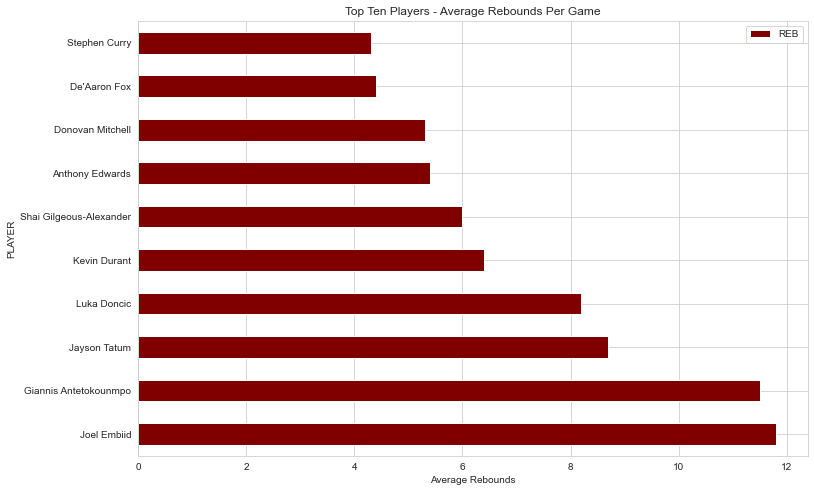

In [33]:
# Plotting bars in descending order
top_ten_rebounds_sorted.plot.barh(x='PLAYER', y='REB', color='maroon', figsize=(12, 8))

# Adding labels and title
plt.xlabel('Average Rebounds')
plt.title('Top Ten Players - Average Rebounds Per Game')

# Display the plot
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 1 to 258
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    258 non-null    object 
 1   PLAYER  258 non-null    object 
 2   TEAM    258 non-null    object 
 3   GP      258 non-null    float64
 4   MIN     258 non-null    float64
 5   PTS     258 non-null    float64
 6   FGM     258 non-null    float64
 7   FGA     258 non-null    float64
 8   FG%     258 non-null    float64
 9   3PM     258 non-null    float64
 10  3PA     258 non-null    float64
 11  3P%     258 non-null    float64
 12  FTM     258 non-null    float64
 13  FTA     258 non-null    float64
 14  FT%     258 non-null    float64
 15  OREB    258 non-null    float64
 16  DREB    258 non-null    float64
 17  REB     258 non-null    float64
 18  AST     258 non-null    float64
 19  STL     258 non-null    float64
 20  BLK     258 non-null    float64
 21  TOV     258 non-null    float64
 22  EF

In [35]:
# Export cleaned data frame
file_path = 'nba_cleaned_data.csv'
df.to_csv(file_path, index=False)

# Machine Learning


In [36]:
df.columns

Index(['YEAR', 'PLAYER', 'TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'EFF'],
      dtype='object')

Text(0.5, 1.0, 'Correlation')

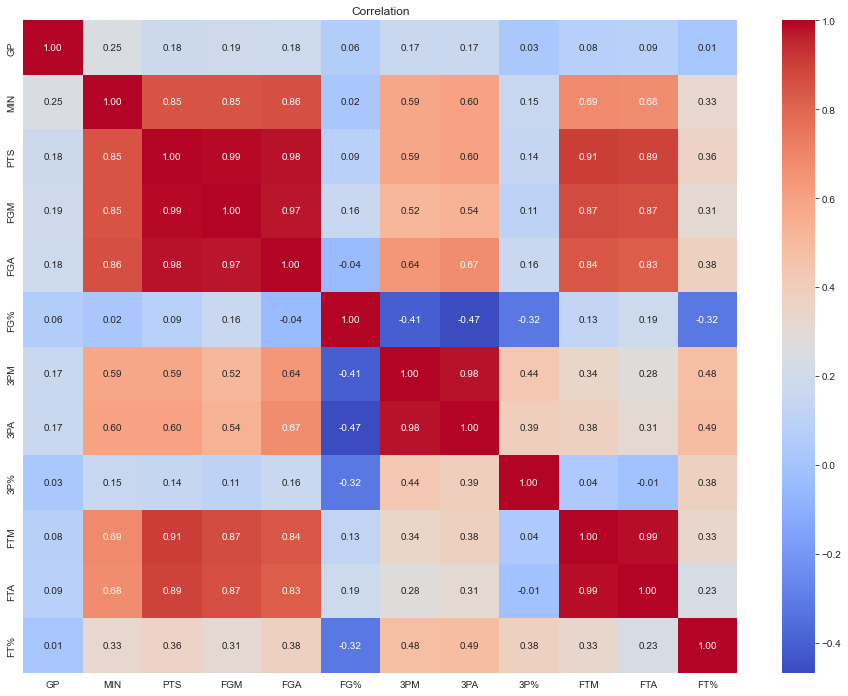

In [37]:
heatmap_columns = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%']

# Create heatmap dataframe
heatmap_data = df[heatmap_columns]

# Create heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


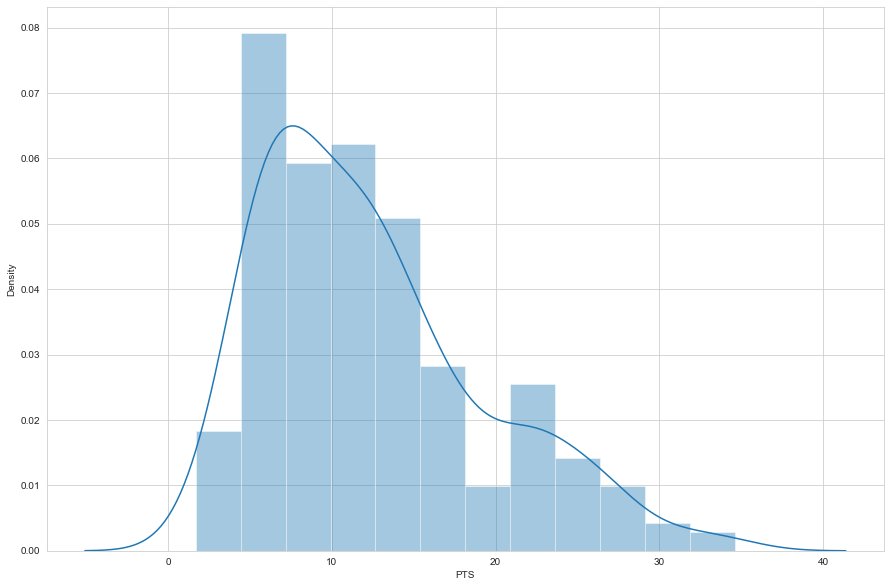

In [38]:
# Distribution of the values in the Points column
sns.set_style('whitegrid')
plt.figure(figsize=(15, 10))
sns.distplot(df['PTS'])
plt.show()